# Internship Project: Predicting Breast Cancer using KNN Algorithm
based on the breast-cancer-wisconsin dataset taken from UCI dataset repo

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('breast-cancer-wisconsin.data')
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# We remove the features from the dataset which do not help our cause
This is called "CLEANING" the data to fit according to our requirement

In [3]:
df.replace('?', -99999, inplace = True) 
df.drop(['id'],1, inplace = True) # imp step esp for the KNN algo
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


# Know your data

In [4]:
df.describe()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bland_chrom,norm_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Let's take a look at our labels a.k.a 'Class'
These are the value our classifier can predict

# Note that the Class is either 2 or 4 where 2 is Benign and 4 is Malignant.

In [5]:
df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

# Convert the df into a numpy array and divide into features and labels

In [6]:
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000147047E6708>,
      dtype=object)

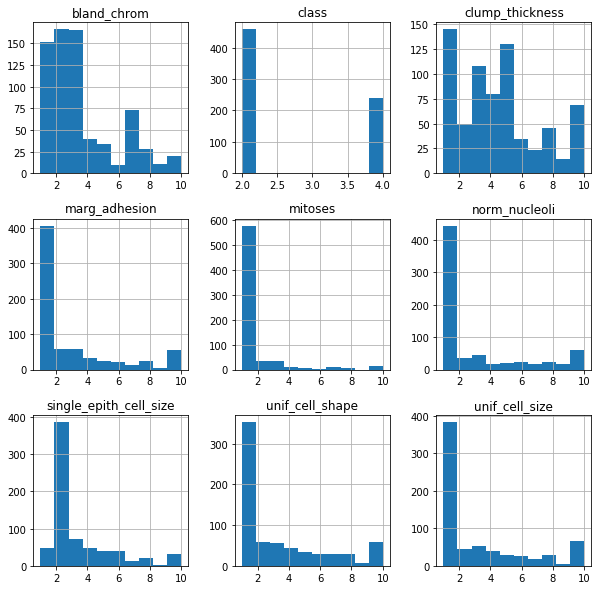

In [8]:
import matplotlib as plt
df.hist(figsize=(10,10))

# Divide the entire df into training and testing sets
0.2 test size indicates an 80:20 split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Train the Classifier on the Training data

In [10]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [11]:
accuracy = clf.score(X_test, y_test)
print(f'{(accuracy * 100)//1} %')

95.0 %


# Provide your own inputs to test the classifier

In [12]:
example_measures = np.array([[4,2,1,1,1,2,3,2,1],[14,2,1,1,1,2,3,2,1]])
#print(len(example_measures))
example_measures.reshape(len(example_measures),-1)

array([[ 4,  2,  1,  1,  1,  2,  3,  2,  1],
       [14,  2,  1,  1,  1,  2,  3,  2,  1]])

In [13]:
prediction = clf.predict(example_measures)
def pred():    
    for i in prediction:
        if i == 2:
            print('BENING')
        elif i == 4:
            print('MALIGNANT')


2